In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions

# AdaBoost

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

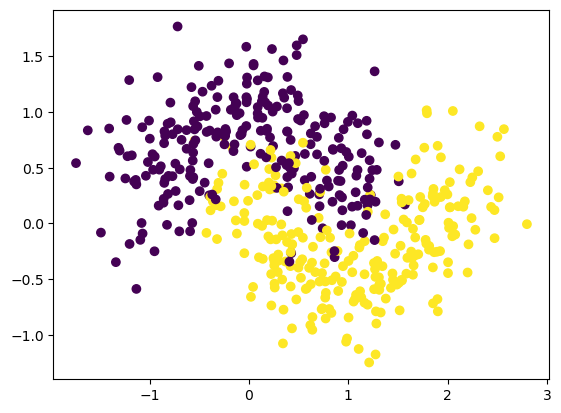

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), 
    n_estimators=1, learning_rate=0.5, 
    algorithm="SAMME.R", random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=1, random_state=42)

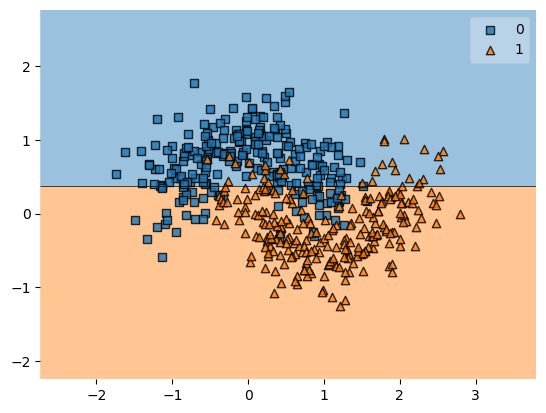

In [6]:
plot_decision_regions(X, y, ada_clf)
plt.show()

# Zad.

Sprawdż różne parametry dla AdaBoostClassifier

* n_estimators=2, learning_rate=0.5
* n_estimators=2, learning_rate=1
* n_estimators=10, learning_rate=0.5
* n_estimators=10, learning_rate=1

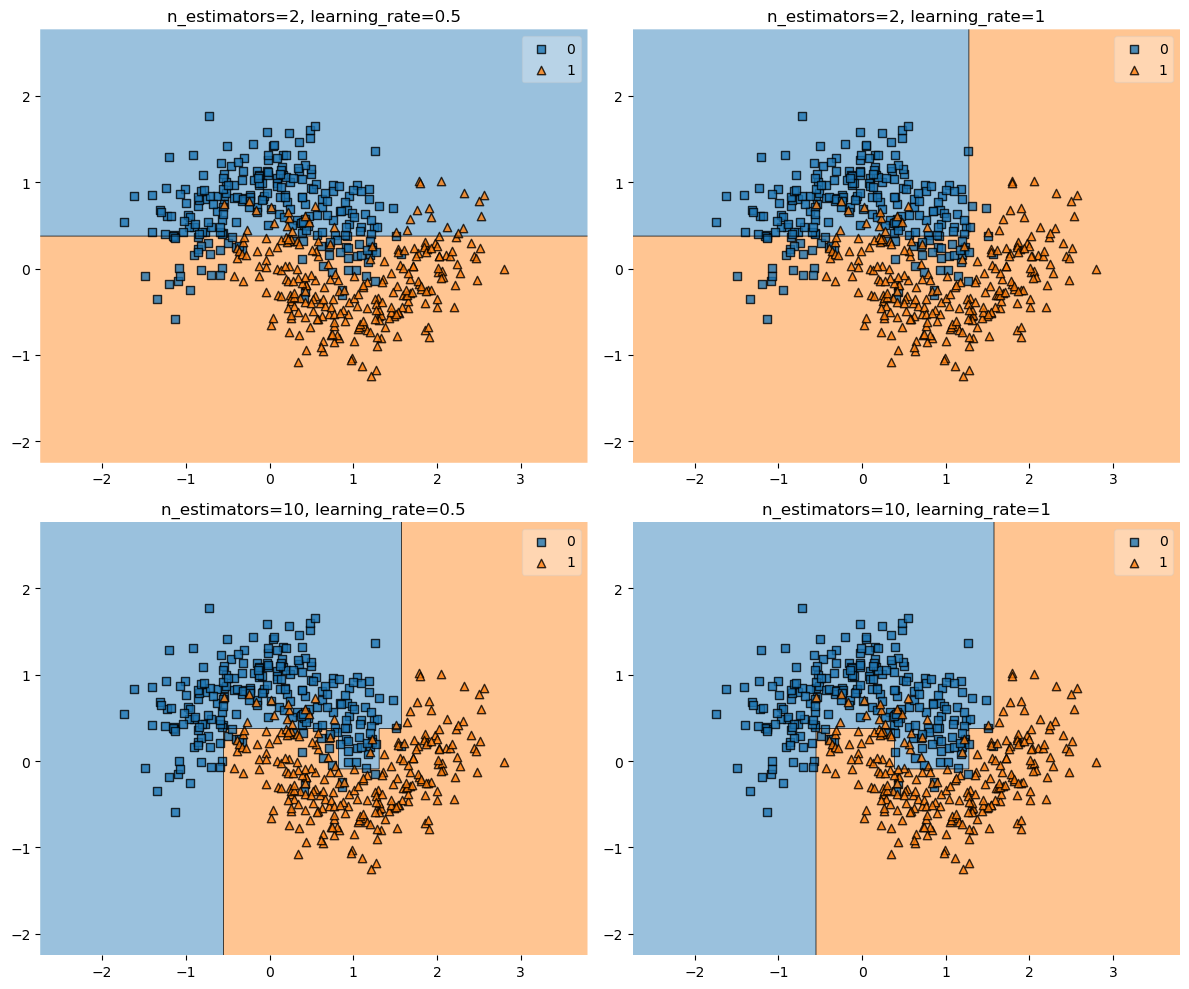

{'n_estimators=2, learning_rate=0.5': 0.824,
 'n_estimators=2, learning_rate=1': 0.864,
 'n_estimators=10, learning_rate=0.5': 0.904,
 'n_estimators=10, learning_rate=1': 0.888}

In [7]:
params = [
    {"n_estimators": 2, "learning_rate": 0.5},
    {"n_estimators": 2, "learning_rate": 1},
    {"n_estimators": 10, "learning_rate": 0.5},
    {"n_estimators": 10, "learning_rate": 1},
]


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, param in zip(axes.flatten(), params):
    ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=param["n_estimators"],
        learning_rate=param["learning_rate"],
        algorithm="SAMME.R",
        random_state=42,
    )
    ada_clf.fit(X_train, y_train)
    plot_decision_regions(X, y, ada_clf, ax=ax)
    ax.set_title(
        f"n_estimators={param['n_estimators']}, learning_rate={param['learning_rate']}"
    )

plt.tight_layout()
plt.show()


performance = {}
for param in params:
    ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=param["n_estimators"],
        learning_rate=param["learning_rate"],
        algorithm="SAMME.R",
        random_state=42,
    )
    ada_clf.fit(X_train, y_train)
    accuracy = ada_clf.score(X_test, y_test)
    performance[
        f"n_estimators={param['n_estimators']}, learning_rate={param['learning_rate']}"
    ] = accuracy

performance